In [1]:
#importing libraries
import nltk
import string
import numpy as np
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
import nltk
nltk.download('stopwords')

[nltk_data] Downloading package stopwords to /root/nltk_data...
[nltk_data]   Package stopwords is already up-to-date!


True

In [2]:
train_data =pd.read_excel("Predict_Amazon_Ratings.xlsx")
train_data.head(5)

,Product_Name,Brand_Name,Price,Rating,Reviews,Review Votes
0,Alltel LG AX390 AX-390 AX 390 SPECIAL FOR PAGE...,LG,38.95,4,it was what i needed.,0.0
1,Alltel LG AX390 AX-390 AX 390 SPECIAL FOR PAGE...,LG,38.95,2,This phone was in great shape although I could...,0.0
2,AT&T LG CU405 No Contract Push To Talk Quad Ba...,LG,64.95,1,"Not good, stopped working after 2 weeks, next ...",0.0
3,AT&T LG CU405 No Contract Push To Talk Quad Ba...,LG,64.95,1,so my boyfriend bought this phone off my accou...,0.0
4,AT&T LG Neon GT365BLS QWERTY Camera Phone,LG,14.44,1,Disappointed - we need to tide over our accoun...,1.0


In [3]:
train_data.describe()

,Price,Rating,Review Votes
count,25760.000000,25859.000000,25114.000000
mean,222.707395,3.864573,1.040495
std,156.480990,1.525529,4.940106
min,5.990000,1.000000,0.000000
25%,99.990000,3.000000,0.000000
50%,199.000000,5.000000,0.000000
75%,325.000000,5.000000,1.000000
max,2000.000000,5.000000,219.000000


In [4]:
train_data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 25859 entries, 0 to 25858
Data columns (total 6 columns):
Product_Name    25859 non-null object
Brand_Name      25859 non-null object
Price           25760 non-null float64
Rating          25859 non-null int64
Reviews         25851 non-null object
Review Votes    25114 non-null float64
dtypes: float64(2), int64(1), object(3)
memory usage: 1.2+ MB


In [5]:
train_data.shape

(25859, 6)

In [6]:
(len(train_data)-train_data.count())/len(train_data)

Product_Name    0.000000
Brand_Name      0.000000
Price           0.003828
Rating          0.000000
Reviews         0.000309
Review Votes    0.028810
dtype: float64

In [0]:
Rating_count =train_data['Rating'].value_counts()

Text(0.5, 1.0, 'Count Of Rating')

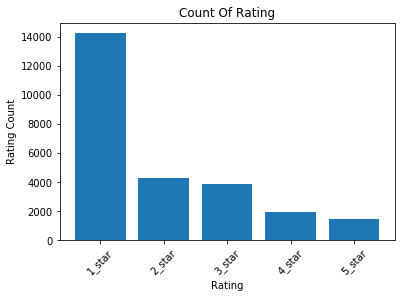

In [8]:
Index =[1,2,3,4,5]
plt.bar(Index, Rating_count)
plt.xticks(Index, ['1_star', '2_star', '3_star', '4_star', '5_star'], rotation =45)
plt.ylabel('Rating Count')
plt.xlabel('Rating')
plt.title('Count Of Rating')

In [0]:
from wordcloud import WordCloud,STOPWORDS

In [0]:
df=train_data[train_data['Rating']==1]
words = ','.join(str(i)for i in train_data['Reviews'])
cleaned_word = " ".join([word for word in words.split()])

In [0]:
wordcloud = WordCloud(stopwords=STOPWORDS,
                      background_color='black',
                      width=3000,
                      height=2500
                     ).generate(cleaned_word)

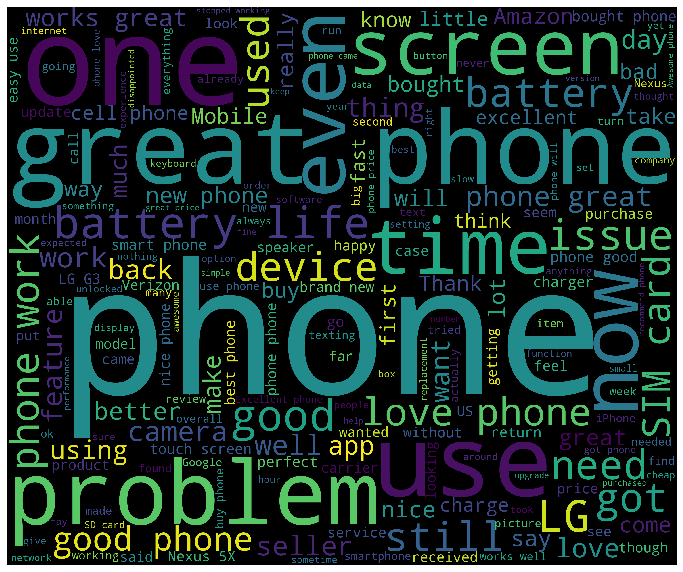

In [12]:
plt.figure(1,figsize=(12, 12))
plt.imshow(wordcloud)
plt.axis('off')
plt.show()

# Data Inspection and Cleaning

In [0]:
from sklearn.model_selection import train_test_split

In [14]:
train_data, test_data =train_test_split(train_data, test_size =0.3, random_state =1)
train_data.shape, test_data.shape


((18101, 6), (7758, 6))

In [15]:
review_train =train_data['Reviews'].values
review_train

array(["The product is great however it doesn't worked as advertised. It suppose to be international but it is actually not. I tried to use it with my sim card from Mexico and the data didn't work. Unfortunately I needed to return it back as it was not working in my country. Be careful if you lkve outside the states.",
       'thanks, shipping very fast, cellphone new, muchas gracias funciono en mi PaÃ\xads PerÃº.',
       'The item fully meets my expectations. Company has a good customer support.',
       ..., 'VERY NICE AND LOOKS NEW.___??????',
       "I bought 2 of these phones in March and now both of them are scrap, both of them are freezing and crashing. After reboot they get stuck at the LG logo . I feel like wasting my money and I'm very disappointed by Amazon services by providing costumers with poor quality products. Please don't buy this product.",
       'not a fancy phone, but easy to use, good sound quality, so far worked with all sim cards i have used at different count

In [16]:
review_train.shape

(18101,)

In [17]:
review_test =test_data['Reviews'].values
review_train

array(["The product is great however it doesn't worked as advertised. It suppose to be international but it is actually not. I tried to use it with my sim card from Mexico and the data didn't work. Unfortunately I needed to return it back as it was not working in my country. Be careful if you lkve outside the states.",
       'thanks, shipping very fast, cellphone new, muchas gracias funciono en mi PaÃ\xads PerÃº.',
       'The item fully meets my expectations. Company has a good customer support.',
       ..., 'VERY NICE AND LOOKS NEW.___??????',
       "I bought 2 of these phones in March and now both of them are scrap, both of them are freezing and crashing. After reboot they get stuck at the LG logo . I feel like wasting my money and I'm very disappointed by Amazon services by providing costumers with poor quality products. Please don't buy this product.",
       'not a fancy phone, but easy to use, good sound quality, so far worked with all sim cards i have used at different count

In [18]:
review_test.shape

(7758,)

In [0]:
import re

In [0]:
ech_review_train= []
for line in review_train:
    ech_review_train.append([wrds for wrds in re.split(' |,|!|\?', str(line))])
    #print(ech_review_train)

In [0]:
ech_review_test = []
for line in review_test:
    ech_review_test.append([wrds for wrds in re.split(' |,|!|\?', str(line))])
    #print(ech_tweet_test)
#ech_review_test

In [0]:
from nltk.stem import WordNetLemmatizer
lemmatizer = WordNetLemmatizer()

In [23]:
from nltk import pos_tag
nltk.download('averaged_perceptron_tagger')
nltk.download('wordnet')

[nltk_data] Downloading package averaged_perceptron_tagger to
[nltk_data]     /root/nltk_data...
[nltk_data]   Package averaged_perceptron_tagger is already up-to-
[nltk_data]       date!
[nltk_data] Downloading package wordnet to /root/nltk_data...
[nltk_data]   Package wordnet is already up-to-date!


True

In [0]:
from nltk.corpus import wordnet
def get_pos_tag(word):
    tag = pos_tag([word])[0][1]
    if tag.startswith('J'):
        return wordnet.ADJ
    elif tag.startswith('V'):
        return wordnet.VERB
    elif tag.startswith('N'):
        return wordnet.NOUN
    elif tag.startswith('R'):
        return wordnet.ADV
    else:
        return wordnet.NOUN
    

In [0]:
from nltk.corpus import stopwords
import string
# stops = set(stopwords.words('english'))
# punctuations = list(string.punctuation)
# stops.update(punctuations)
# stops, string.punctuation


punctuations = list(string.punctuation)
stop = stopwords.words('english')
stop += punctuations

In [0]:
def clean_review(words):
    output_words = list()
    for w in words:
        if w.lower() not in stop and len(w) > 0:            
            clean_word = lemmatizer.lemmatize(w, pos = get_pos_tag(w))
            output_words.append(clean_word.lower())
    return output_words

In [0]:
text_review_train = [(clean_review(text)) for text in ech_review_train]
#text_review_train

In [0]:
text_review_test = [(clean_review(text)) for text in ech_review_test]
#text_review_test

In [0]:
clean_text_review_train = [" ".join(text) for text  in text_review_train]
clean_text_review_test = [" ".join(text) for text  in text_review_test]

In [30]:
# print(clean_text_review_train)
# print(clean_text_review_test)

IOPub data rate exceeded.
The notebook server will temporarily stop sending output
to the client in order to avoid crashing it.
To change this limit, set the config variable
`--NotebookApp.iopub_data_rate_limit`.

Current values:
NotebookApp.iopub_data_rate_limit=1000000.0 (bytes/sec)
NotebookApp.rate_limit_window=3.0 (secs)



In [0]:
rating = [rating for rating  in train_data['Rating']]

In [0]:
from sklearn.feature_extraction.text import CountVectorizer

In [0]:
count_vec = CountVectorizer(max_features = 2000, ngram_range=(1,3))
x_train_features = count_vec.fit_transform(clean_text_review_train, rating)
#creating matrix form
x_train_features = x_train_features.todense()
x_test_features = count_vec.transform(clean_text_review_test)
x_test_features = x_test_features.todense()

In [0]:
from sklearn import preprocessing

In [0]:
min_max_scaler=preprocessing.MinMaxScaler()
min_max_scaler_train =min_max_scaler.fit_transform(x_train_features)

In [0]:
min_max_scaler2 =preprocessing.MinMaxScaler()

In [0]:
min_max_scaler_test =min_max_scaler2.fit_transform(x_test_features)

In [0]:
from sklearn.svm import SVC

In [38]:
svc = SVC(C=100, degree = 2, kernel = 'linear')
svc.fit(min_max_scaler, rating)

SVC(C=100, cache_size=200, class_weight=None, coef0=0.0,
    decision_function_shape='ovr', degree=2, gamma='auto_deprecated',
    kernel='linear', max_iter=-1, probability=False, random_state=None,
    shrinking=True, tol=0.001, verbose=False)

In [39]:
svc.score(min_max_scaler,  rating)

0.932324180984476

In [0]:
pred =svc.predict(min_max_scaler_test)

In [46]:
pred

array([4, 4, 4, ..., 1, 4, 5])

In [48]:
set(pred)

{1, 2, 3, 4, 5}

In [49]:
svc.score(min_max_scaler_test, pred)

1.0

In [51]:
sample_review ="1.0 out of 5 starsMy new mobile MI 6 pro says system destroyed on first day of receipt"
sample_review

'1.0 out of 5 starsMy new mobile MI 6 pro says system destroyed on first day of receipt'

In [58]:
from nltk.tokenize import sent_tokenize, word_tokenize
import nltk
nltk.download('punkt')

[nltk_data] Downloading package punkt to /root/nltk_data...
[nltk_data]   Package punkt is already up-to-date!


True

In [57]:
sample_review =sent_tokenize(sample_review)
sample_review

['1.0 out of 5 starsMy new mobile MI 6 pro says system destroyed on first day of receipt']

In [60]:
x_train_features

matrix([[0, 0, 0, ..., 0, 0, 0],
        [0, 0, 0, ..., 0, 0, 0],
        [0, 0, 0, ..., 0, 0, 0],
        ...,
        [0, 0, 0, ..., 0, 0, 0],
        [0, 0, 0, ..., 0, 0, 0],
        [0, 0, 0, ..., 0, 0, 0]])

In [0]:
import numpy as np

In [65]:
a =np.array([1,2,3,4])
a.


array([1, 2, 3, 4])